In [1]:
def zonotope(L):
    """
    Input:  list L
    Output: zonotope associated to L
    """
    return sum([Polyhedron(vertices = [-vector(v),vector(v)]) for v in L])

In [2]:
def fiber_zonotope(L,n):
    '''
    Input:  list L, associated to a zonotope Z
            integer n
    Output: list F_π, whose associated zonotope is the fiber zonotope of Z
            with respect to the projection onto the first n coordinates
    '''
    N = len(L[1])
    s = len(L)
    X = [ℓ[0:n] for ℓ in L]
    Y = [ℓ[n:N] for ℓ in L]
    F_π = []
    for I in Subsets(range(s),n+1,submultiset=True):
        f = []
        for j in range(n+1):    # we compute now the summands of F_π
            II = copy(I)
            II.remove(II[j])
            XX = [X[ii] for ii in II]
            M = matrix(XX)
            dd = M.determinant()
            g = 1/(factorial(n+1))*(-1)^(n+1-j)*dd*matrix(Y[I[j]])
            f.append(g)
        F = factorial(n+1)*sum(f)    # this is F_π for the set of indices I
        F_π.append(F)
    return F_π

### Example

In [3]:
L = [[1, 0, 1], [1, 1, 0], [1, -1, 0]]

In [4]:
Z = zonotope(L)

In [5]:
Z.plot()

Graphics3d Object

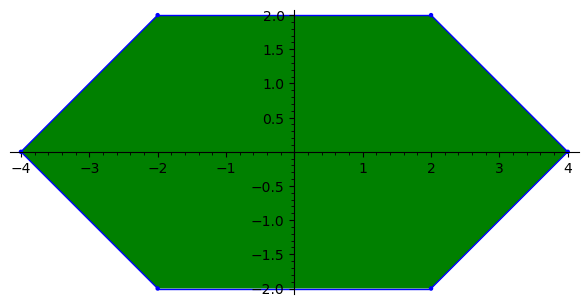

In [6]:
zonotope(fiber_zonotope(L,1)).plot()